In [11]:
#Initializing all the libraries which will be required
import numpy as np
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns

#initializing all the libraries which might be required
uberdf = pd.read_csv("Uber Request Data.csv")

#viewing the data frame to find any  quality issues
uberdf

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp
0,619,Airport,1.0,Trip Completed,11/7/2016 11:51,11/7/2016 13:00
1,867,Airport,1.0,Trip Completed,11/7/2016 17:57,11/7/2016 18:47
2,1807,City,1.0,Trip Completed,12/7/2016 9:17,12/7/2016 9:58
3,2532,Airport,1.0,Trip Completed,12/7/2016 21:08,12/7/2016 22:03
4,3112,City,1.0,Trip Completed,13-07-2016 08:33:16,13-07-2016 09:25:47
5,3879,Airport,1.0,Trip Completed,13-07-2016 21:57:28,13-07-2016 22:28:59
6,4270,Airport,1.0,Trip Completed,14-07-2016 06:15:32,14-07-2016 07:13:15
7,5510,Airport,1.0,Trip Completed,15-07-2016 05:11:52,15-07-2016 06:07:52
8,6248,City,1.0,Trip Completed,15-07-2016 17:57:27,15-07-2016 18:50:51
9,267,City,2.0,Trip Completed,11/7/2016 6:46,11/7/2016 7:25


In [2]:
#checking for duplicate Request id
ids = uberdf["Request id"]
uberdf[ids.isin(ids[ids.duplicated()])].sort_values("Request id")
#no duplicates exist for request Id

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp


In [3]:
uberdf[uberdf.duplicated(keep=False)]

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp


In [8]:
#Checking null values 
uberdf[["Request id","Pickup point","Status","Request timestamp"]].isnull().sum().sum()

0

In [12]:
#Replacing / with - to ensure that dates and time are in the proper format
uberdf['Request timestamp'] = uberdf['Request timestamp'].str.replace('/','-')
uberdf['Drop timestamp'] = uberdf['Request timestamp'].str.replace('/','-')

In [13]:
#Converting Request and drop timestamp to datetime format
uberdf['Request timestamp'] = pd.to_datetime(uberdf['Request timestamp'])
uberdf['Drop timestamp'] = pd.to_datetime(uberdf['Drop timestamp'])

In [14]:
#Formatting the request timestamp in one format
uberdf['Request timestamp'] = pd.to_datetime(uberdf['Request timestamp'], dayfirst=True)

In [15]:
#Checking dataframe for any other quality issue
uberdf.head()

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp
0,619,Airport,1.0,Trip Completed,2016-11-07 11:51:00,2016-11-07 11:51:00
1,867,Airport,1.0,Trip Completed,2016-11-07 17:57:00,2016-11-07 17:57:00
2,1807,City,1.0,Trip Completed,2016-12-07 09:17:00,2016-12-07 09:17:00
3,2532,Airport,1.0,Trip Completed,2016-12-07 21:08:00,2016-12-07 21:08:00
4,3112,City,1.0,Trip Completed,2016-07-13 08:33:16,2016-07-13 08:33:16


In [16]:
#Exctracting hour from request timestamp to create new slots for day
uberdf['Request hourid'] = uberdf['Request timestamp'].dt.hour

In [17]:
uberdf.head()

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp,Request hourid
0,619,Airport,1.0,Trip Completed,2016-11-07 11:51:00,2016-11-07 11:51:00,11
1,867,Airport,1.0,Trip Completed,2016-11-07 17:57:00,2016-11-07 17:57:00,17
2,1807,City,1.0,Trip Completed,2016-12-07 09:17:00,2016-12-07 09:17:00,9
3,2532,Airport,1.0,Trip Completed,2016-12-07 21:08:00,2016-12-07 21:08:00,21
4,3112,City,1.0,Trip Completed,2016-07-13 08:33:16,2016-07-13 08:33:16,8


In [18]:
uberdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6745 entries, 0 to 6744
Data columns (total 7 columns):
Request id           6745 non-null int64
Pickup point         6745 non-null object
Driver id            4095 non-null float64
Status               6745 non-null object
Request timestamp    6745 non-null datetime64[ns]
Drop timestamp       6745 non-null datetime64[ns]
Request hourid       6745 non-null int64
dtypes: datetime64[ns](2), float64(1), int64(2), object(2)
memory usage: 368.9+ KB


In [19]:
#Creating Request slots for day
bins = [0, 5, 10, 17, 20, 23]
group_names = ['Late Night', 'Morning', 'Day', 'Evening', 'night']

uberdf['req slots'] = pd.cut(uberdf['Request hourid'], bins, labels=group_names)

In [20]:
uberdf

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp,Request hourid,req slots
0,619,Airport,1.0,Trip Completed,2016-11-07 11:51:00,2016-11-07 11:51:00,11,Day
1,867,Airport,1.0,Trip Completed,2016-11-07 17:57:00,2016-11-07 17:57:00,17,Day
2,1807,City,1.0,Trip Completed,2016-12-07 09:17:00,2016-12-07 09:17:00,9,Morning
3,2532,Airport,1.0,Trip Completed,2016-12-07 21:08:00,2016-12-07 21:08:00,21,night
4,3112,City,1.0,Trip Completed,2016-07-13 08:33:16,2016-07-13 08:33:16,8,Morning
5,3879,Airport,1.0,Trip Completed,2016-07-13 21:57:28,2016-07-13 21:57:28,21,night
6,4270,Airport,1.0,Trip Completed,2016-07-14 06:15:32,2016-07-14 06:15:32,6,Morning
7,5510,Airport,1.0,Trip Completed,2016-07-15 05:11:52,2016-07-15 05:11:52,5,Late Night
8,6248,City,1.0,Trip Completed,2016-07-15 17:57:27,2016-07-15 17:57:27,17,Day
9,267,City,2.0,Trip Completed,2016-11-07 06:46:00,2016-11-07 06:46:00,6,Morning


In [21]:
#Save as csv file for making tableau plots
uberdf.to_csv('Uber_new.csv')

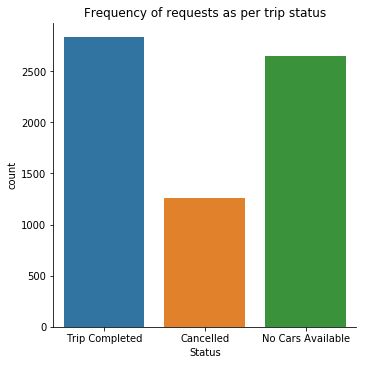

In [87]:
#Create plot to visualise the frequency of requests that get cancelled or show 'no cars available'.

#Seaborn is used univariate analysis
#plotting the frequency of cancelled, trip completed and No cars available by date and pickup point

sns.catplot(x="Status", kind="count", data=uberdf);
plt.title("Frequency of requests as per trip status")
plt.show()

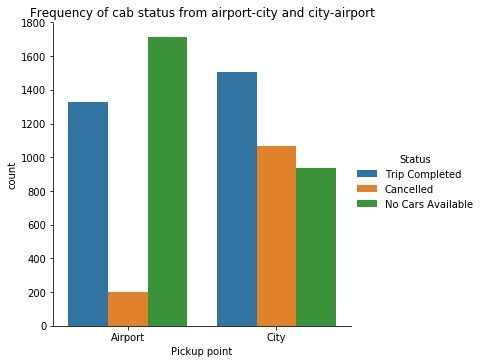

In [94]:
#Plot to identify the most problematic types of requests (city to airport / airport to city etc.)
sns.catplot(x="Pickup point", kind="count", hue="Status", data=uberdf);
plt.title("Frequency of cab status from airport-city and city-airport")
plt.show()

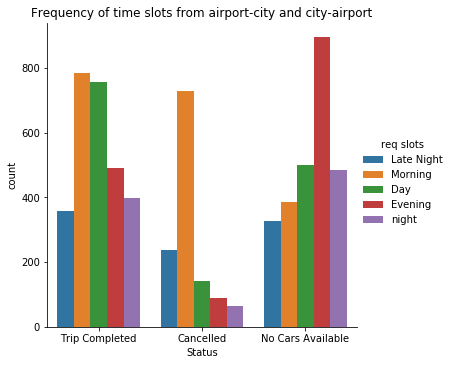

In [95]:
#Plot to identify the most problematic types of request and the time slots (early mornings, late evenings etc.)

#segmented analysis
#plotting the number of trips with different statuses by segment and hour for both pickup points

sns.catplot(x="Status", kind="count", hue="req slots", data=uberdf);
plt.title("Frequency of time slots from airport-city and city-airport")
plt.show()

In [43]:
#Calculating supply and demand

uber_supply = uberdf.loc[uberdf['Status'] == 'Trip Completed'].groupby('req slots', as_index = False)['Request id'].count().rename(columns={'Request id':'Supply'})
uber_demand = uberdf.groupby('req slots', as_index = False)['Request id'].count().rename(columns={'Request id':'Demand'})

uber_supply_demand = pd.concat([uber_supply.set_index('req slots'), uber_demand.set_index('req slots')], axis=1, join='inner').reset_index()

uber_supply_demand

,req slots,Supply,Demand
0,Late Night,359,924
1,Morning,785,1901
2,Day,757,1399
3,Evening,491,1475
4,night,399,947


In [44]:
#Calculating gap for demand-supply

uber_supply_demand['Gap'] = uber_supply_demand['Demand'] - uber_supply_demand['Supply']

uber_supply_demand

,req slots,Supply,Demand,Gap
0,Late Night,359,924,565
1,Morning,785,1901,1116
2,Day,757,1399,642
3,Evening,491,1475,984
4,night,399,947,548


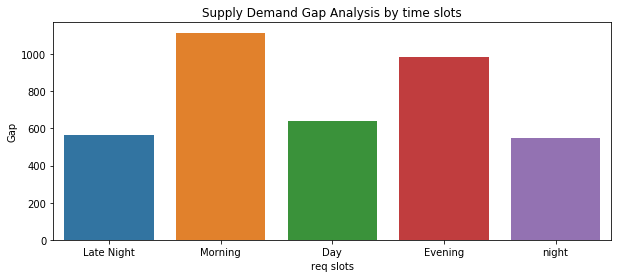

In [97]:
#Plot between time slots and gap analysis
#Bar Plots are best as we have one measure and one fact variable


plt.figure(figsize=(10, 4))
plt.title("Supply Demand Gap Analysis by time slots")
sns.barplot(x="req slots", y="Gap", data=uber_supply_demand)
plt.show()

In [82]:
#Calculating supply and demand for the type of requests -> city-airport and airport-city

uber_supply_city = uberdf.loc[uberdf['Status'] == 'Trip Completed'].groupby('Pickup point', as_index = False)['Request id'].count().rename(columns={'Request id':'Supply'})
uber_demand_city  = uberdf.groupby('Pickup point', as_index = False)['Request id'].count().rename(columns={'Request id':'Demand'})

uber_supply_demand_city  = pd.concat([uber_supply_city.set_index('Pickup point'), uber_demand_city.set_index('Pickup point')], axis=1, join='inner').reset_index()

uber_supply_demand_city ['Gap'] = uber_supply_demand_city['Demand'] - uber_supply_demand_city ['Supply']

uber_supply_demand_city 

,Pickup point,Supply,Demand,Gap
0,Airport,1327,3238,1911
1,City,1504,3507,2003


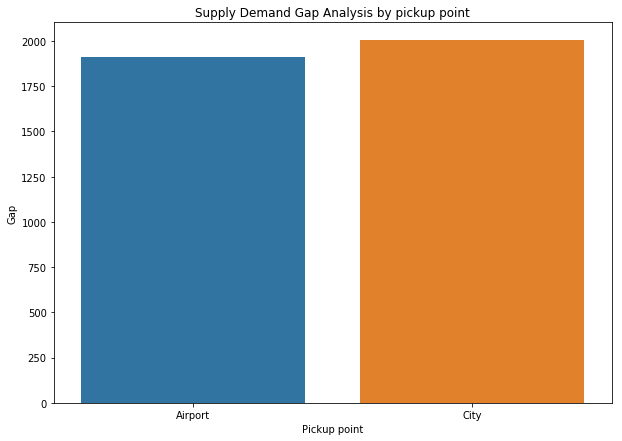

In [86]:
#Plot between pickup point and gap analysis
#Bar Plots are best as we have one measure and one fact variable

plt.figure(figsize=(10, 7))
plt.title("Supply Demand Gap Analysis by pickup point")
sns.barplot(x="Pickup point", y="Gap", data=uber_supply_demand_city)
plt.show()

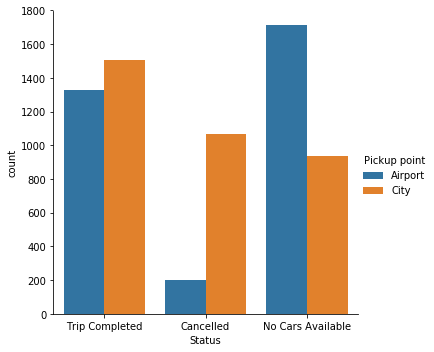

In [88]:
#bivariate
#plotting the total nummber of requests by Status for all time segments to do demand supply analysis.
sns.catplot(x="Status", kind="count", hue="Pickup point", data=uberdf);
plt.show()

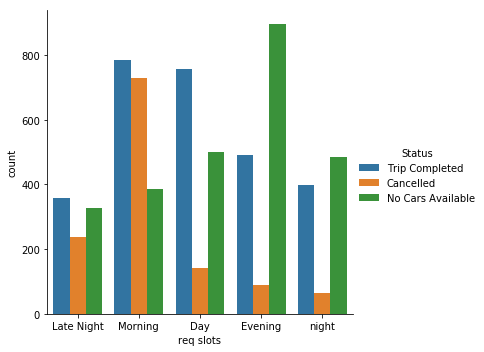

In [100]:
sns.catplot(x="req slots", kind="count", hue="Status", data=uberdf);
#plt.title("Frequency of time slots from airport-city and city-airport")
plt.show()

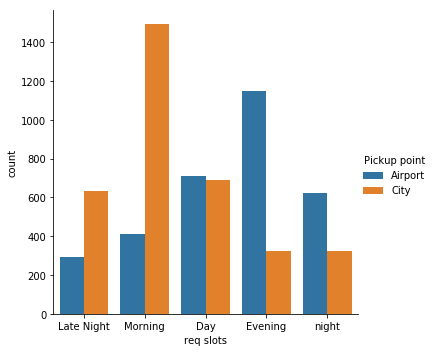

In [101]:
sns.catplot(x="req slots", kind="count", hue="Pickup point", data=uberdf);
#plt.title("Frequency of time slots from airport-city and city-airport")
plt.show()